In [0]:
import seaborn as sns

In [0]:
import pandas as pd
import numpy as np

In [0]:
!pip install geopandas

     |████████████████████████████████| 921kB 2.5MB/s 
     |████████████████████████████████| 11.8MB 335kB/s 
     |████████████████████████████████| 10.1MB 46.6MB/s 


In [0]:
import geopandas as gpd

In [0]:
df=pd.read_csv(open('C:/Users/Intra24/Documents/ArcGIS/Export_Output.txt'))

In [0]:
df.describe()

,fid,max_height,parking_spaces,one_bed_units,two_bed_units,three_bed_units,four_plus_bed_units,has_underground_parking,studio_units,on_highstreet,units
count,113.00000,111.000000,113.000000,108.000000,108.000000,108.000000,108.000000,107.000000,58.000000,15.000000,113.000000
mean,57.00000,10.228622,7.477876,2.037037,5.453704,0.546296,0.240741,0.130841,0.068966,0.866667,8.557522
std,32.76431,1.821084,8.281970,2.874073,3.677119,1.423332,1.281576,0.338813,0.368118,0.351866,3.856669
min,1.00000,6.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,29.00000,8.740000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
50%,57.00000,9.850000,7.000000,1.000000,5.500000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
75%,85.00000,11.910000,9.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000
max,113.00000,16.000000,78.000000,17.000000,20.000000,8.000000,8.000000,1.000000,2.000000,1.000000,30.000000


In [0]:
[ i for i in df.columns[:-2].tolist() if i not in rej_columns]

['fid',
 'planning_application',
 'max_height',
 'parking_spaces',
 'one_bed_units',
 'two_bed_units',
 'three_bed_units',
 'four_plus_bed_units',
 'has_underground_parking',
 'studio_units',
 'on_highstreet',
 'postcode',
 'status',
 'address',
 'town',
 'inspire_ids',
 'on_corner',
 'units']

In [0]:
df.one_bed_units.isnull().sum()

5

In [0]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Statuses of applications in the dataset')

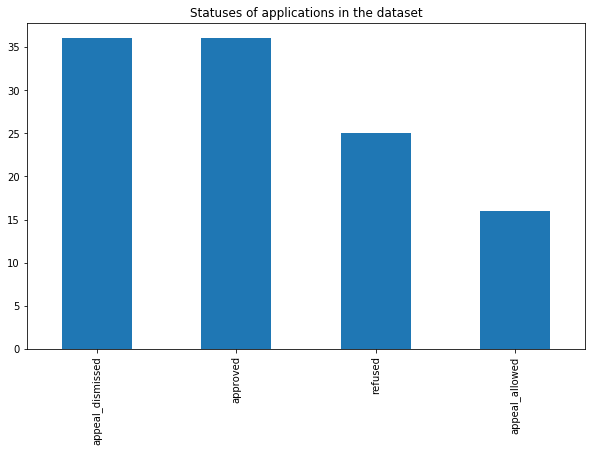

In [0]:
df.status.value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Statuses of applications in the dataset')

In [0]:
df.status.value_counts()

appeal_dismissed    36
approved            36
refused             25
appeal_allowed      16
Name: status, dtype: int64

Text(0.5, 1.0, 'Statuses of applications in the dataset after modification')

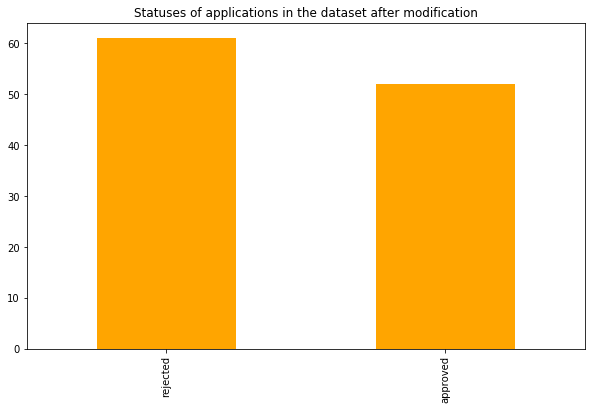

In [0]:
df.if_reject.map({True:'rejected', False:'approved'}).value_counts().plot(kind='bar', figsize=(10,6), color='orange')
plt.title('Statuses of applications in the dataset after modification')


Text(0.5, 1.0, 'Share of missings in each descriptive feature')

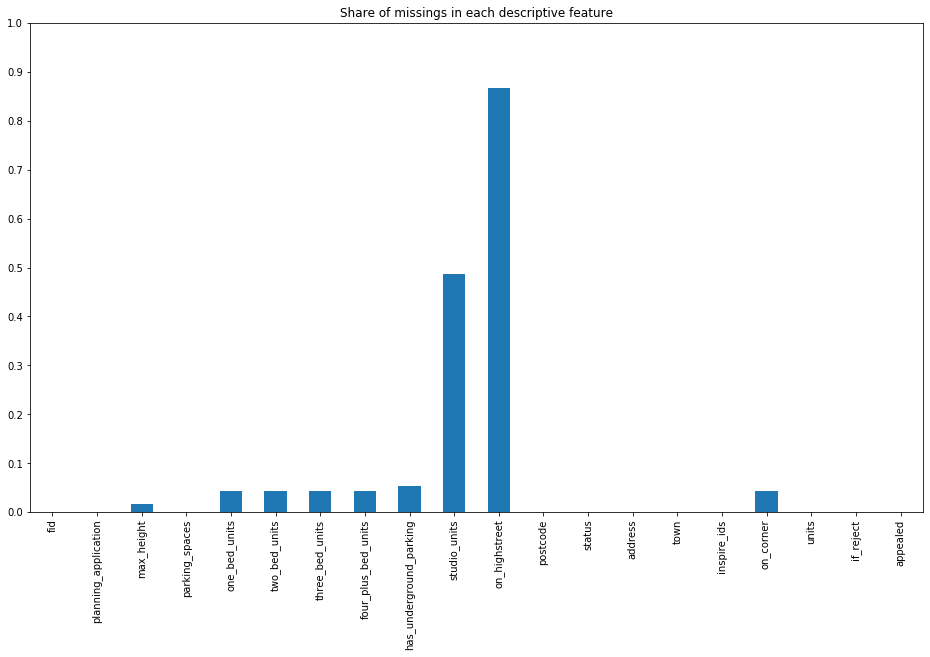

In [0]:
df[[ i for i in df.columns if i not in rej_columns]].isnull().mean().plot(kind='bar', figsize=(16,9))
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Share of missings in each descriptive feature')

In [0]:
df['on_highstreet'].value_counts()

1.0    13
0.0     2
Name: on_highstreet, dtype: int64

In [0]:
df['planning_application'].nunique()

113

In [0]:
df['planning_application'].apply(lambda x: x.split('/')[1]).value_counts()

02693    2
04199    2
03789    1
04322    1
05229    1
        ..
03267    1
01262    1
05736    1
04754    1
01241    1
Name: planning_application, Length: 111, dtype: int64

In [0]:
v=[i for i in df['planning_application'] if '04199'in i ]

In [0]:
df[ df ['planning_application'].isin (v)]

,fid,planning_application,max_height,parking_spaces,one_bed_units,two_bed_units,three_bed_units,four_plus_bed_units,has_underground_parking,studio_units,...,rejected_size,rejected_neighbour_effect,rejected_living_conditions,rejected_parking,rejected_local_character,units,reason_of_rejection,if_reject,appealed,if_rejected
0,1,18/04199/OUT,NaN,11,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,9,,False,False,approved
40,41,14/04199/FULL1,16.0,24,9.0,20.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,30,,False,False,approved


In [0]:
df[df['appealed']][['status']+rej_columns]

,status,rejected_size,rejected_neighbour_effect,rejected_living_conditions,rejected_parking,rejected_local_character,reason_of_rejection
1,appeal_dismissed,False,False,False,False,True,local_character
4,appeal_allowed,NaN,NaN,NaN,NaN,NaN,
6,appeal_dismissed,False,True,False,False,False,neighbour_effect
8,appeal_dismissed,False,False,True,False,False,living_conditions
9,appeal_allowed,NaN,NaN,NaN,NaN,NaN,
10,appeal_dismissed,False,False,True,False,False,living_conditions
13,appeal_dismissed,True,True,False,True,False,size|neighbour_effect|parking
15,appeal_dismissed,True,False,False,False,False,size
17,appeal_allowed,NaN,NaN,NaN,NaN,NaN,
19,appeal_allowed,NaN,NaN,NaN,NaN,NaN,


In [0]:
rej_columns=[ i for i in df.columns if 'reject' in i and 'if' not in i ]
df['reason_of_rejection']=df[rej_columns].apply(lambda row: '|'.join(['_'.join(str(i).split('_')[1:]) for i,v in row.items() if v==True] ), axis=1)

In [0]:
rej_columns

['rejected_size',
 'rejected_neighbour_effect',
 'rejected_living_conditions',
 'rejected_parking',
 'rejected_local_character',
 'reason_of_rejection']

In [0]:
df['if_reject']=df['reason_of_rejection']!=''

In [0]:
df['if_reject'].value_counts()

True     61
False    52
Name: if_reject, dtype: int64

Text(0.5, 1.0, 'Rejection rate of  "on_corner" variable')

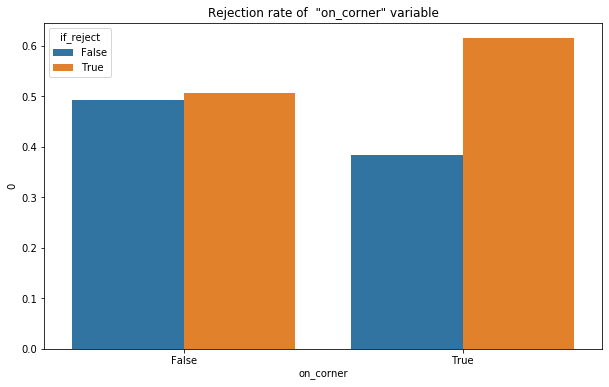

In [0]:
plt.figure(figsize=(10,6))
df_corner=(df.groupby(['on_corner','if_reject']).size()/df.groupby(['on_corner']).size()).reset_index()
sns.barplot(data=df_corner, x='on_corner' , hue='if_reject', y=0)
plt.title('Rejection rate of  "on_corner" variable')

Text(0.5, 1.0, 'Max_height distribution by application result')

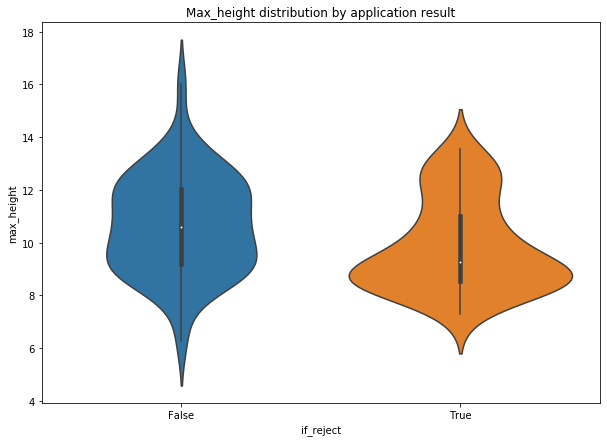

In [0]:
plt.figure(figsize=(10,7))
df['if_rejected']=df['if_reject'].map({True:'rejected', False:'approved'})
sns.violinplot(data=df, y='max_height', x='if_reject', )
plt.title('Max_height distribution by application result')

Text(0.5, 1.0, 'Distribution of proposed units by application result ')

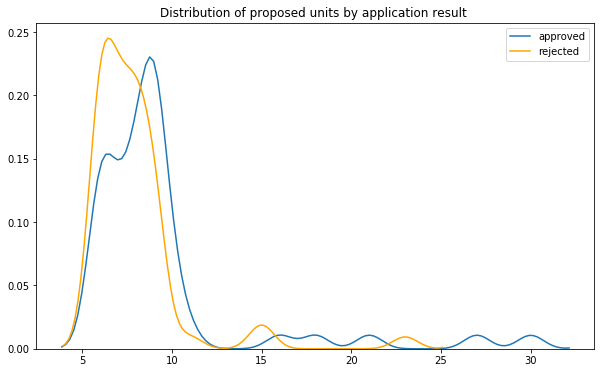

In [0]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['if_reject']==0]['units'], label='approved')
sns.kdeplot(df[df['if_reject']==1]['units'], color='orange', label='rejected')
plt.title('Distribution of proposed units by application result ')

In [0]:
(df['if_reject']*1).to_frame().join(df['max_height']).corr()

,if_reject,max_height
if_reject,1.000000,-0.228019
max_height,-0.228019,1.000000


In [0]:
(df['if_reject']*1).to_frame().join(df['units']).corr()

,if_reject,units
if_reject,1.000000,-0.194264
units,-0.194264,1.000000


In [0]:
sns.heatmap([df['if_reject']*1,df['max_height']].corr() )

AttributeError: 'list' object has no attribute 'corr'

(array([72., 31.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 6. ,  8.4, 10.8, 13.2, 15.6, 18. , 20.4, 22.8, 25.2, 27.6, 30. ]),
 <a list of 10 Patch objects>)

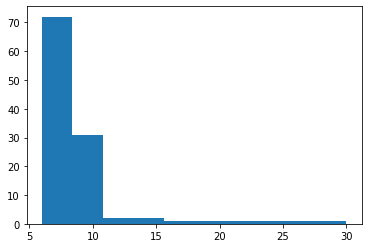

In [0]:
plt.hist(df['units'])

In [0]:
df['appealed']=df['status'].apply(lambda x: 'appeal' in x)

In [0]:
df[df['status']!='approved']['appealed'].value_counts()

True     52
False    25
Name: appealed, dtype: int64

In [0]:
df[df['status']!='approved'].groupby(['reason_of_rejection','appealed']).size()

reason_of_rejection                                      appealed
                                                         True        16
living_conditions                                        True         2
living_conditions|local_character                        False        1
local_character                                          True         2
neighbour_effect                                         False        1
                                                         True         2
neighbour_effect|local_character                         True         1
parking                                                  True         2
parking|local_character                                  False        1
                                                         True         1
size                                                     False        4
                                                         True         9
size|living_conditions                                   False        

In [0]:
df['reason_of_rejection']

0                                                     
1                                      local_character
2                                                     
3                                                 size
4                                                     
                            ...                       
108                                                   
109                              size|neighbour_effect
110    size|neighbour_effect|living_conditions|parking
111                                               size
112            size|neighbour_effect|living_conditions
Name: reason_of_rejection, Length: 113, dtype: object

In [0]:
df_corner

,on_corner,if_reject,0
0,False,False,0.492754
1,False,True,0.507246
2,True,False,0.384615
3,True,True,0.615385


([<matplotlib.axis.YTick at 0x1d7c1089a88>,
 <a list of 11 Text yticklabel objects>)

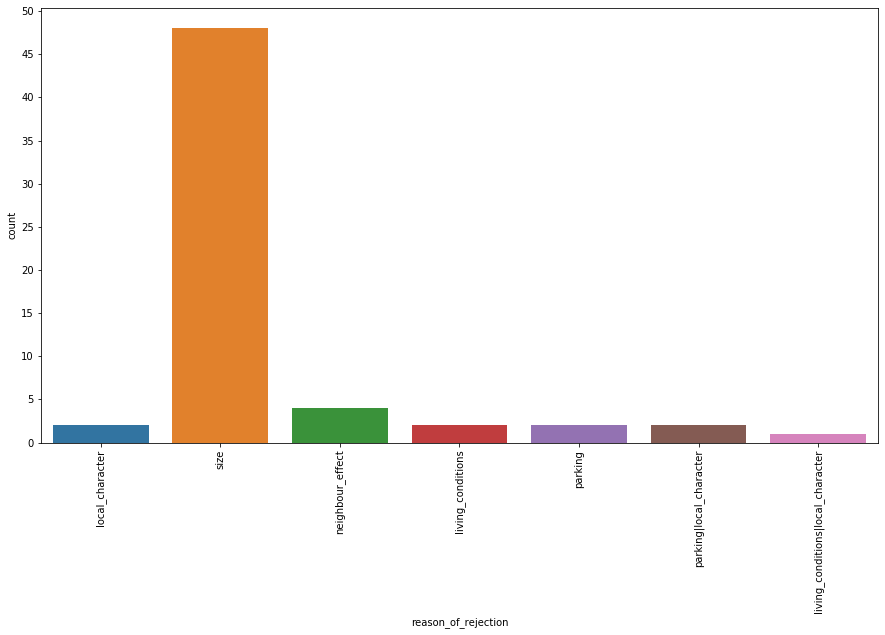

In [0]:
plt.figure(figsize=(15,8))
sns.countplot(df[df['if_reject']==True]['reason_of_rejection'].apply(lambda x: 'size' if 'size'in x else ('neighbour_effect' if 'neighbour' in x else x )))
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0,55,5))

In [0]:
48/61

0.7868852459016393

In [0]:
df['reason_of_rejection'].value_counts()

                                                                                               52
rejected_size                                                                                  13
rejected_size|rejected_neighbour_effect                                                        12
rejected_size|rejected_neighbour_effect|rejected_living_conditions                              6
rejected_size|rejected_neighbour_effect|rejected_living_conditions|rejected_parking             5
rejected_size|rejected_living_conditions                                                        5
rejected_neighbour_effect                                                                       3
rejected_size|rejected_neighbour_effect|rejected_parking                                        3
rejected_size|rejected_neighbour_effect|rejected_parking|rejected_local_character               2
rejected_local_character                                                                        2
rejected_living_cond

In [0]:
df['planning_application'].apply(lambda x: x.split('/')[2]).value_counts()

FULL1    83
OUT      26
DET       4
Name: planning_application, dtype: int64

In [0]:
df.describe()

,fid,max_height,parking_spaces,one_bed_units,two_bed_units,three_bed_units,four_plus_bed_units,has_underground_parking,studio_units,on_highstreet,units
count,113.00000,111.000000,113.000000,108.000000,108.000000,108.000000,108.000000,107.000000,58.000000,15.000000,113.000000
mean,57.00000,10.228622,7.477876,2.037037,5.453704,0.546296,0.240741,0.130841,0.068966,0.866667,8.557522
std,32.76431,1.821084,8.281970,2.874073,3.677119,1.423332,1.281576,0.338813,0.368118,0.351866,3.856669
min,1.00000,6.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,29.00000,8.740000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
50%,57.00000,9.850000,7.000000,1.000000,5.500000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
75%,85.00000,11.910000,9.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000
max,113.00000,16.000000,78.000000,17.000000,20.000000,8.000000,8.000000,1.000000,2.000000,1.000000,30.000000


In [0]:
df.groupby(['rejected_size'])['studio_units'].mean()


rejected_size
False    0.000000
True     0.074074
Name: studio_units, dtype: float64

In [0]:
for v in rej_columns:
    print(df[v].value_counts())

True     48
False    13
Name: rejected_size, dtype: int64
True     33
False    28
Name: rejected_neighbour_effect, dtype: int64
False    41
True     20
Name: rejected_living_conditions, dtype: int64
False    46
True     15
Name: rejected_parking, dtype: int64
False    52
True      9
Name: rejected_local_character, dtype: int64


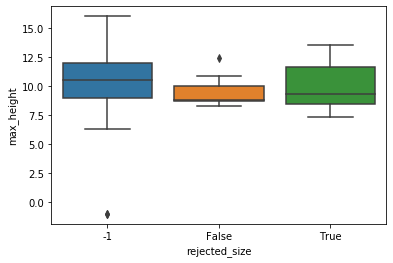

In [0]:
sns.boxplot(data=df.fillna(-1), x='rejected_size', y='max_height')

In [0]:
df

,fid,planning_application,max_height,parking_spaces,one_bed_units,two_bed_units,three_bed_units,four_plus_bed_units,has_underground_parking,studio_units,...,town,inspire_ids,on_corner,rejected_size,rejected_neighbour_effect,rejected_living_conditions,rejected_parking,rejected_local_character,units,reason_of_rejection
0,1,18/04199/OUT,NaN,11,NaN,NaN,NaN,NaN,0.0,NaN,...,Bromley,40879904,NaN,NaN,NaN,NaN,NaN,NaN,9,
1,2,16/04099/FULL1,8.802,8,NaN,NaN,NaN,NaN,NaN,NaN,...,Bromley,39022637,False,False,False,False,False,True,8,rejected_local_character
2,3,16/05875/FULL1,9.190,13,NaN,NaN,NaN,NaN,NaN,NaN,...,Bromley,53133601,True,NaN,NaN,NaN,NaN,NaN,9,
3,4,16/03597/FULL1,9.730,13,NaN,NaN,NaN,NaN,NaN,NaN,...,Bromley,53133601,True,True,False,False,False,False,9,rejected_size
4,5,15/04152/FULL1,9.710,9,NaN,NaN,NaN,NaN,NaN,NaN,...,Bromley,59732233,False,NaN,NaN,NaN,NaN,NaN,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,109,18/01228/FULL1,9.000,5,5.0,1.0,0.0,0.0,0.0,2.0,...,London,37950806,False,NaN,NaN,NaN,NaN,NaN,8,
109,110,17/05106/FULL1,9.000,5,5.0,2.0,1.0,0.0,0.0,0.0,...,London,37950806,False,True,True,False,False,False,8,rejected_size|rejected_neighbour_effect
110,111,17/01181/FULL1,12.000,4,2.0,6.0,1.0,0.0,0.0,0.0,...,London,37950806,False,True,True,True,True,False,9,rejected_size|rejected_neighbour_effect|reject...
111,112,17/02629/FULL1,7.490,3,2.0,4.0,0.0,0.0,0.0,0.0,...,London,37935591,True,True,False,False,False,False,6,rejected_size


In [0]:
sns.boxplot(data=df.fillna(-1), x='rejected_size', y='unites')

ValueError: Could not interpret input 'unites'

In [0]:
df.groupby('rejected_size')['max_height'].median()

rejected_size
False    8.802
True     9.280
Name: max_height, dtype: float64

In [0]:
for j in range(df.shape[0]):
    print(j)
    print('|'.join([i for i,v in df.loc[j].items() if v==True ]))

0
fid
1
rejected_local_character
2
on_corner
3
on_corner|rejected_size
4

5
three_bed_units|has_underground_parking|on_corner|rejected_neighbour_effect
6
three_bed_units|on_corner|rejected_neighbour_effect
7
on_corner
8
on_corner|rejected_living_conditions
9
has_underground_parking|on_corner
10
has_underground_parking|on_corner|rejected_living_conditions
11
has_underground_parking|on_corner|rejected_size|rejected_neighbour_effect|rejected_living_conditions|rejected_parking
12
has_underground_parking|on_corner|rejected_size|rejected_neighbour_effect
13
two_bed_units|on_highstreet|rejected_size|rejected_neighbour_effect|rejected_parking
14

15
rejected_size
16

17

18
one_bed_units|rejected_size|rejected_neighbour_effect|rejected_living_conditions
19

20
one_bed_units
21

22
on_corner
23
rejected_size|rejected_neighbour_effect|rejected_living_conditions|rejected_local_character
24
on_highstreet|on_corner|rejected_size|rejected_neighbour_effect|rejected_parking|rejected_local_character
25

In [0]:
df.shape

(113, 24)